### IMPORTS

In [1]:
from Inference import BBVI 

In [2]:
import torch
import matplotlib.pyplot as plt
import _pickle as pickle

### EXAMPLE

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device = 'cpu'

In [6]:
# load data
data = torch.load('C:\\Users\\Patrick\\Documents\\BayesianNN\\data\\foong_data.pt')
x_data = data[0].to(device)
y_data = data[1].to(device)
y_data = y_data.unsqueeze(-1)

In [20]:
# load data
data = torch.load('C:\\Users\\Patrick\\Documents\\BayesianNN\\data\\foong_data.pt')
x_train = data[0].to(device)
y_train = data[1].to(device)
y_train = y_train.unsqueeze(-1)

In [21]:
data = torch.load('C:\\Users\\Patrick\\Documents\\BayesianNN\\data\\foong_data_validation.pt')
x_data_validation = data[0].to(device)
y_data_validation = data[1].to(device)
y_data_validation = y_data_validation.unsqueeze(-1)

In [76]:
data = torch.load('C:\\Users\\Patrick\\Documents\\BayesianNN\\data\\foong_data_test.pt')
x_data_test = data[0].to(device)
y_data_test = data[1].to(device)
y_data_test = y_data_test.unsqueeze(-1)

In [98]:
filename = 'C:\\Users\\Patrick\\Documents\\BayesianNN\\Experiments\\foong\\tanh\\MAP\\models\\' + '4Layers_25Neurons_(0)'
filehandler = open(filename, 'rb')
netparam = pickle.load(filehandler)

In [99]:
Net = BBVI.VariationalNetwork(input_size=netparam['input_size'],
                              output_size=netparam['output_size'],
                              layer_width=netparam['layer_width'],
                              nb_layers=netparam['nb_layers'])
Net.set_network(netparam)
Net.set_device(device)
Net.requires_grad_mus(False)

In [100]:
Net.compute_elbo(x_data, y_data, n_samples_ELBO=1000, sigma_noise=0.1, device=device).detach().cpu().numpy()

array(12904.257, dtype=float32)

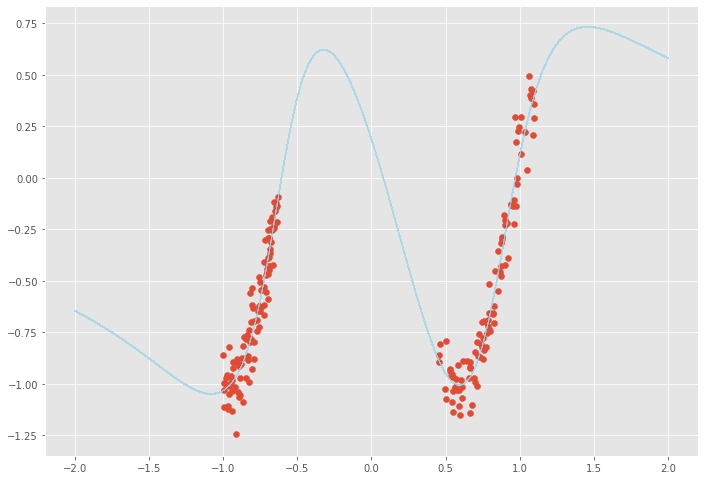

In [101]:
x_test = torch.linspace(-2.0, 2.0).unsqueeze(1).to(device)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.scatter(x_data.cpu(), y_data.cpu())
for _ in range(1000):
    Net.sample_parameters()

    y_test = Net.forward(x_test)
    plt.plot(x_test.detach().cpu().numpy(), y_test.squeeze(0).detach().cpu().numpy(), alpha=0.05, linewidth=1, color='lightblue') 

In [106]:
Net.requires_grad_mus(True)

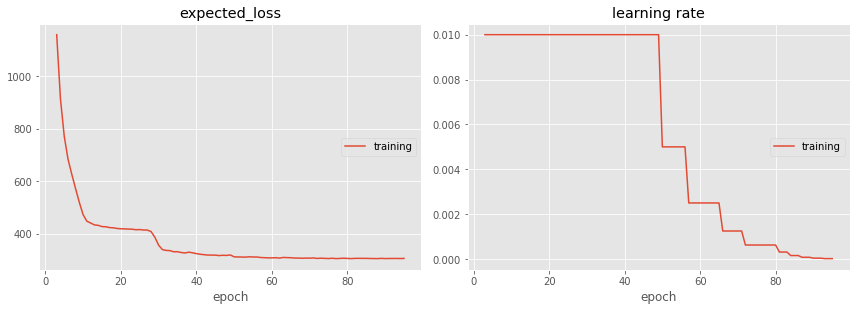

expected_loss:
training   (min:  304.537, max: 2084.576, cur:  305.316)

learning rate:
training   (min:    0.000, max:    0.010, cur:    0.000)


KeyboardInterrupt: 

In [107]:
optimizer = torch.optim.Adam
optimizer_params = {'lr': 0.01}
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau
scheduler_params = {'patience': 2, 'factor': 0.5}

voptimizer = BBVI.VariationalOptimizer(model=Net, sigma_noise=0.1, optimizer=optimizer, optimizer_params=optimizer_params, scheduler=scheduler, scheduler_params=scheduler_params, min_lr=0.00001)
Net = voptimizer.run((x_data,y_data), n_epoch=100, n_iter=150, n_ELBO_samples=75, plot=True)

In [108]:
Net.compute_elbo(x_data, y_data, n_samples_ELBO=1000, sigma_noise=0.1, device=device).detach().cpu().numpy()

array(302.4722, dtype=float32)

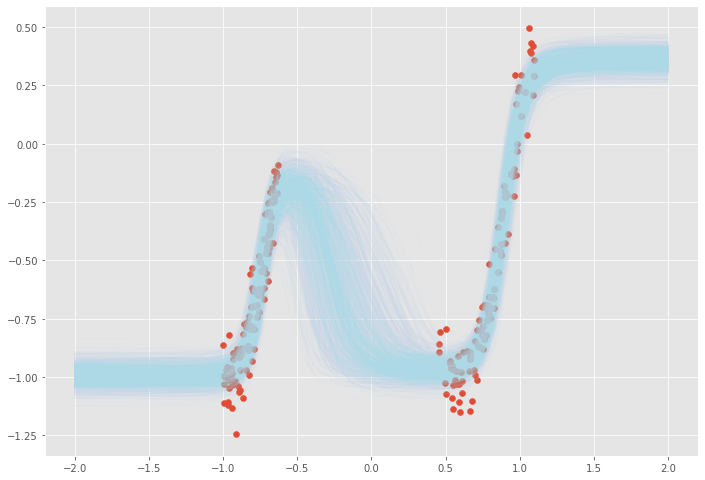

In [109]:
x_test = torch.linspace(-2.0, 2.0).unsqueeze(1).to(device)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.scatter(x_data.cpu(), y_data.cpu())
for _ in range(1000):
    Net.sample_parameters()

    y_test = Net.forward(x_test)
    plt.plot(x_test.detach().cpu().numpy(), y_test.squeeze(0).detach().cpu().numpy(), alpha=0.05, linewidth=1, color='lightblue')